Para entregar:
Ejercicio 2 completo, 3 completo y 4 (opcional)
Ejercicio 3: entregar tambien el diagrama del modelo, ej 3.1.

No hay que quedarse con un unico mensaje, nuestro sistema debe poder recibirlos todos, porque desconocemos el mensaje real.

Ejemplo Apuestas de Kelly.

Tengo que apostar todo en dos opciones, o pasa una u otra (cara/ceca, river/boke). Puedo apostar por ambos.
Cara paga x3, ceca x1.2 Cual es la proporcion optima para distribuir mis apuestas?

# Ejercicio 2

In [1]:
from collections import Counter
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales.

Usamos b=0.5 y calculamos esperanza en 10 juegos.

In [2]:
GANANCIA_CARA = 3
GANANCIA_CECA = 1.2

In [3]:
#Wealth para 1 paso
def w_bd(w0,b,d):
    """Wealth obtenido en funcion de w0, el wealth inicial; b, proporcion apostada 
    a cara; y d, el dato de si es cara (d=1) o ceca (d=0)"""
    if d==1:
        return w0*b*GANANCIA_CARA
    else:
        return w0*(1-b)*GANANCIA_CECA
    
def w_eventos(w0,b,eventos):
    for evento in eventos:
        w0 = w_bd(w0,b,evento)
    return w0

#Posibles resultados dado N eventos
def posibles_resultados(N):
    posibilidades = [[0],[1]]
    resultados :list[list[int]] = posibilidades.copy()
    for i in range(N-1):
        resultados = [k+j for k in resultados for j in posibilidades]
    return resultados

def probabilidad_dato(dato):
    return 0.5**(len(dato))

def esperanza(w0,b,N):
    posibilidades = posibles_resultados(N)
    sum = 0
    for eventos in posibilidades:
        sum += w_eventos(w0,b,eventos) * probabilidad_dato(eventos)
    return sum

esperanzas = []
for i in range(3):
    esperanzas.append(esperanza(1,0.5,i+1))
esperanzas



[1.05, 1.1025, 1.157625]

In [4]:
esperanzas[1]/esperanzas[0],esperanzas[2]/esperanzas[1]

(1.05, 1.0499999999999998)

La tasa de crecimiento entre paso y paso es 1.05
Es decir, la esperanza al paso T es 1.05**T

## 2.2 Simular 10000 personas, y graficar el promedio de sus recursos en los primeros 10 pasos temporales.

In [5]:
def simular_jugada(N_eventos):
    resultados = []
    for i in range(N_eventos):
        resultados.append(rd.choice([0,1]))
    return resultados

def simular_jugadas(N_jugadores,N_eventos):
    return [simular_jugada(N_eventos) for i in range(N_jugadores)]


jugadas = simular_jugadas(10000,10)
plata_ronda_10 = [w_eventos(1,0.5,eventos) for eventos in jugadas]
sum(plata_ronda_10)/len(plata_ronda_10)

1.5792258282054985

## 2.3 Distribuir tu creencia entre conviene o no conviene participar de esta apuesta (el tiempo que quieras).

In [6]:
esperanza(1,1,20)

3325.256730079651

Si hago all in a cara, la esperanza me dice que me hago millonario. Por las dudas meto un 0.8 de cagon nomas

## 2.4 Elegir una apuesta y graficar c´omo se actualizan los recursos en el tiempo.

Elijo b=0.8
Pocas personas, muchos pasos

[1, 0.6, 0.54, 0.729, 0.5904899999999998, 0.2869781399999999, 0.08368282562399995, 0.03660286792793758, 0.009606056659007937, 0.003781520264385063, 0.0022329499009167354, 0.001977801880488484, 0.0026277125229217002, 0.005236778140852617, 0.0062618368768939245, 0.004492525749786066, 0.004834712563408915, 0.0031217778424838744, 0.003023601745711169, 0.004392769750742529, 0.009572900652546068, 0.012516990250357627, 0.02454977607323402, 0.07222481121953986, 0.3187253117994119, 2.1097837986625807, 8.379355223410252, 49.91999227925775, 446.097383877279, 2391.861859139431, 19236.841640321458, 92828.79148245156, 268771.288630782, 466911.2100155289, 1216681.7323500232, 1902264.5925999775, 4461245.472885753, 6277584.489592267, 5300053.619126902, 6712112.376709244, 12750565.124941634, 36332134.031943455, 62116021.543216735, 63718802.68246888, 98044410.63074115, 90516827.54146434, 50140315.08045343, 41661610.299181655, 51924976.037820585, 97075093.25129962, 272226617.5785426, 458041267.86514467, 1

/tmp/ipykernel_6834/1387981861.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(apostadores).T)


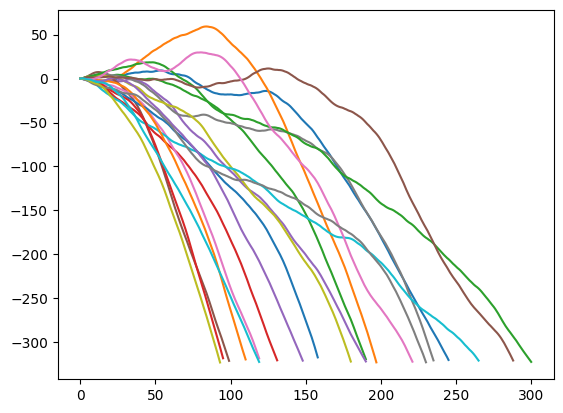

In [7]:
apuesta = 0.5
apostadores = []
tiradas = 1000
N_apostadores = 20
for i in range(N_apostadores):
    apostador = [1]
    eventos = []
    for j in range(tiradas):
        eventos.append(rd.choice([0,1]))
        apostador.append(w_eventos(apostador[j],apuesta,eventos))
    apostadores.append(apostador.copy())
    print(apostador)
    print(eventos)
apostadores = np.array(apostadores)
plt.plot(np.log10(apostadores).T)

    


## 2.5 Graficar la tasa de crecimiento temporal (l´ımT →∞) de los recursos para cada apuesta alternativa b.

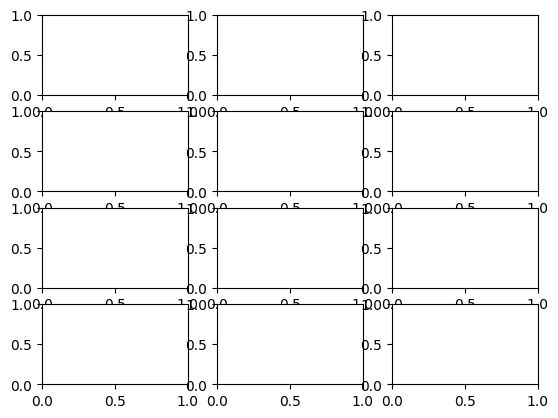

In [10]:
filas,columnas = 4,3
total = filas*columnas
bs = np.linspace(0,1,total)
fig,ax = plt.subplots(4,3)
data = []
for idx,b in enumerate(bs):
    apuesta = b
    apostadores = []
    tiradas = 100
    N_apostadores = 20
    for i in range(N_apostadores):
        apostador = [1]
        eventos = []
        for j in range(tiradas):
            eventos.append(rd.choice([0,1]))
            apostador.append(w_eventos(apostador[j],apuesta,eventos))
        apostadores.append(apostador.copy())
        # print(apostador)
        # print(eventos)
    apostadores = np.array(apostadores)
    data.append(apostadores)


/tmp/ipykernel_6834/3290239335.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(data[i]).T)


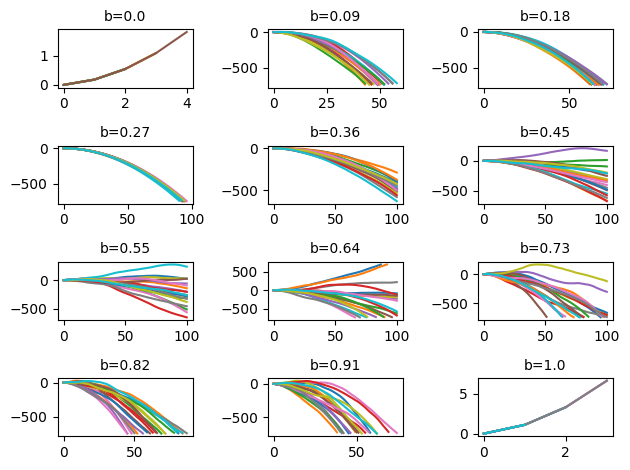

In [9]:
for i in range(len(data)):
    plt.subplot(filas,columnas,i+1)
    plt.plot(np.log(data[i]).T)
    plt.title(label=f"b={round(bs[i],2)}").set_fontsize(10)
    plt.tight_layout()

En realidad este era analitico:

w_t(b) = r(b)^T
w_t(b)^(1/t) = r(b)

lim t-> inf w_t(b)^(1/t) = lim w0 (bQc)^(n_c/T) ((1-b)Qs)^(n_s/T)
n_c/T -> p_c  y n_s/T -> (1-p_c)


Queremos comparar b!!!

BayesFactor, comparo las tasas de crecimiento dependientes de la apuesta que hagas

r(b)/r(d) con b!=d

$$\frac{r(b)}{r(d)} = \frac{\omega_0 (b Q_c)^P ((1-b)Q_s)^{1-P}}{\omega_0 (d Q_c)^P ((1-d)Q_s)^{1-P}} = \frac{(b)^P ((1-b))^{1-P}}{(d)^P ((1-d))^{1-P}}$$

NO DEPENDE DE LO QUE TE OFREZCA LA CASA DE APUESTAS!!!!
Lo hago con log

$$log(b^P (1-b)^{1-P}) = p log(b) + (1-p) log(1-b)$$

Es la entropia cruzada!! Minimizo cuando p=b!!!!!!!

el r(b) es la media geometrica!!!



Calcular r(b) para cada tirada y graficar como cambia!!!!

## Ejercicio 3

3.1 Tenemos prevalencia uniforme
Estado depende de prevalencia, es bernoulli
Sensibilidad: diagnostico. Probabiliad de Test positivo | estado infectado. Depende del estado de la persona
Especificidad: probabilidad de Test negativo | estado no infectado. Depende del estado de la persona. Ambos son Uniformes.


Hacer diagrama!!!



